In [1]:
random_seed = 12
import pandas as pd
import numpy as np

train_ER_data = pd.read_csv("dataset/split/train_ER.csv")
val_ER_data = pd.read_csv("dataset/split/val_ER.csv")
test_ER_data = pd.read_csv("dataset/split/test_ER.csv")

train_IP_data = pd.read_csv("dataset/split/train_IP.csv")
val_IP_data = pd.read_csv("dataset/split/val_IP.csv")
test_IP_data = pd.read_csv("dataset/split/test_IP.csv")

train_EX_data = pd.read_csv("dataset/split/train_EX.csv")
val_EX_data = pd.read_csv("dataset/split/val_EX.csv")
test_EX_data = pd.read_csv("dataset/split/test_EX.csv")


In [2]:
base_columns = ['id', 'seeker_post', 'response_post']
df_base = test_ER_data[base_columns]
df_base.to_csv('dataset/split/test_input.csv', index=False)

def rename_columns(df, suffix):
    return df[['level', 'rationale_labels', 'rationale_labels_trimmed', 'response_post_masked']].rename(
        columns=lambda col: f"{col}_{suffix}"
    )
df_er_measures = rename_columns(test_ER_data, 'ER')
df_ip_measures = rename_columns(test_IP_data, 'IP')
df_ex_measures = rename_columns(test_EX_data, 'EX')
df_merged = pd.concat([df_base, df_er_measures, df_ip_measures, df_ex_measures], axis=1)
df_merged.to_csv('dataset/split/test_input_ground_truth.csv', index=False)

In [3]:
!python3 src/test.py \
    --input_path dataset/split/test_input.csv \
    --output_path dataset/split/test_output.csv \
    --ER_model_path output/model_ER.pth \
    --IP_model_path output/model_IP.pth \
    --EX_model_path output/model_EX.pth


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/homes/gws/sehajd/miniconda3/lib/python3.13/site-packages/transformers/tokenization_utils_base.py:2690: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [4]:
def rename_columns(df, suffix):
    return df[['level', 'rationale_labels', 'rationale_labels_trimmed', 'response_post_masked']].rename(
        columns=lambda col: f"{col}_{suffix}"
    )
df_er_measures = rename_columns(test_ER_data, 'ER')
df_ip_measures = rename_columns(test_IP_data, 'IP')
df_ex_measures = rename_columns(test_EX_data, 'EX')
df_merged = pd.concat([df_base, df_er_measures, df_ip_measures, df_ex_measures], axis=1)
df_merged.to_csv('dataset/split/test_input_ground_truth.csv', index=False)

In [5]:
test_preds = pd.read_csv("dataset/split/test_output.csv")

ER Accuracy: 0.807131280388979
IP Accuracy: 0.8492706645056726
EX Accuracy: 0.9254457050243112
ER f1: 0.7532250358337316
IP f1: 0.5769327987052545
EX f1: 0.5681876135217943
ER Confusion Matrix:
 [[0.87378641 0.12621359 0.        ]
 [0.30726257 0.68715084 0.00558659]
 [0.03846154 0.38461538 0.57692308]]


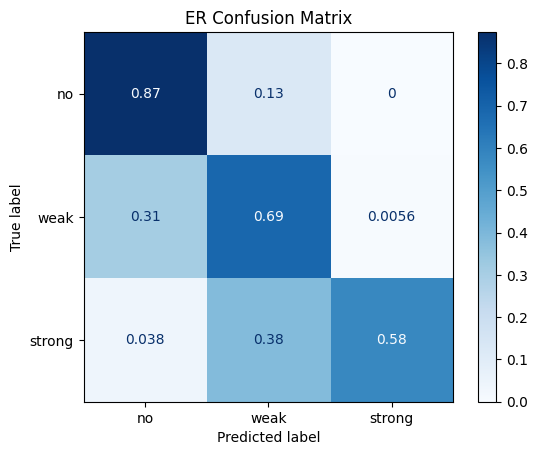

IP Confusion Matrix:
 [[0.62420382 0.33121019 0.04458599]
 [0.47826087 0.52173913 0.        ]
 [0.74642857 0.24642857 0.00714286]]


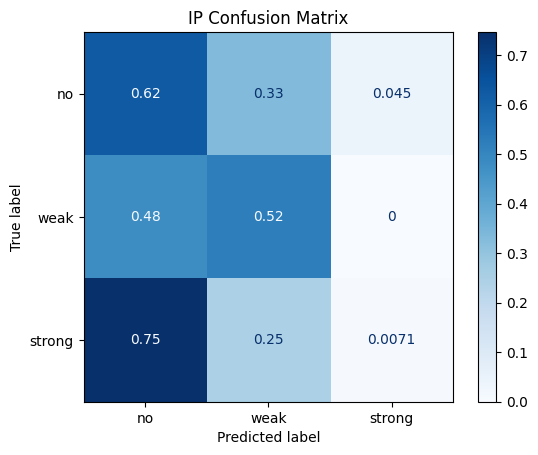

EX Confusion Matrix:
 [[0.971537   0.         0.028463  ]
 [0.08695652 0.         0.91304348]
 [0.11940299 0.         0.88059701]]


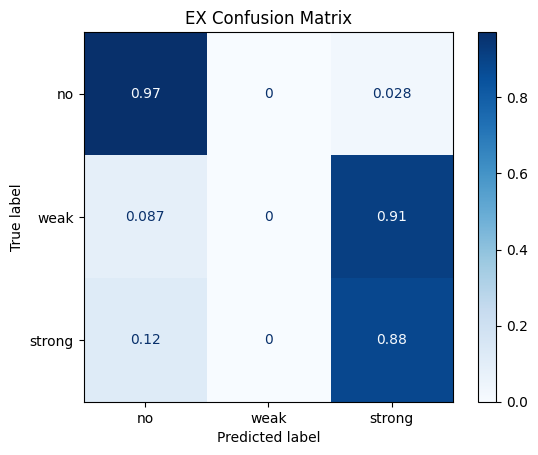

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print('ER Accuracy:', accuracy_score(df_merged['level_ER'], test_preds['ER_label']))
print('IP Accuracy:', accuracy_score(df_merged['level_IP'], test_preds['IP_label']))
print('EX Accuracy:', accuracy_score(df_merged['level_EX'], test_preds['EX_label']))

print('ER f1:', f1_score(df_merged['level_ER'], test_preds['ER_label'], average='macro', labels=[0, 1, 2]))
print('IP f1:', f1_score(df_merged['level_IP'], test_preds['IP_label'], average='macro', labels=[0, 1, 2]))
print('EX f1:', f1_score(df_merged['level_EX'], test_preds['EX_label'], average='macro', labels=[0, 1, 2]))

class_names = ['no', 'weak', 'strong']
cm_interp_ER = confusion_matrix(df_merged['level_ER'], test_preds['ER_label'], labels=[0,1,2])
cm_interp_ER_norm = (cm_interp_ER.T / cm_interp_ER.sum(axis=1)).T
print('ER Confusion Matrix:\n', cm_interp_ER_norm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_interp_ER_norm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('ER Confusion Matrix')
plt.show()

cm_interp_IP = confusion_matrix(df_merged['level_IP'], test_preds['ER_label'], labels=[0,1,2])
cm_interp_IP_norm = (cm_interp_IP.T / cm_interp_IP.sum(axis=1)).T
print('IP Confusion Matrix:\n', cm_interp_IP_norm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_interp_IP_norm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('IP Confusion Matrix')
plt.show()

cm_interp_EX = confusion_matrix(df_merged['level_EX'], test_preds['EX_label'], labels=[0,1,2])
cm_interp_EX_norm = (cm_interp_EX.T / cm_interp_EX.sum(axis=1)).T
print('EX Confusion Matrix:\n', cm_interp_EX_norm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_interp_EX_norm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('EX Confusion Matrix')
plt.show()



In [7]:
df_comparison = df_merged.copy()
df_comparison = df_comparison.rename(columns={'level_ER':'true_ER', 'level_IP':'true_IP', 'level_EX':'true_EX'})
df_comparison['pred_ER'] = test_preds['ER_label'].values
df_comparison['pred_IP'] = test_preds['IP_label'].values
df_comparison['pred_EX'] = test_preds['EX_label'].values
df_comparison = df_comparison.drop(['rationale_labels_ER', 'rationale_labels_trimmed_ER', 'response_post_masked_ER',
                                    'rationale_labels_IP', 'rationale_labels_trimmed_IP', 'response_post_masked_IP',
                                    'rationale_labels_EX', 'rationale_labels_trimmed_EX', 'response_post_masked_EX'], axis=1)
df_comparison

,id,seeker_post,response_post,true_ER,true_IP,true_EX,pred_ER,pred_IP,pred_EX
0,4ky3sa_d3iqns7,I'm tired of fighting. I don't want to do it a...,Anything you want to talk about dude,1,0,0,1,0,0
1,5cjk8c_d9x9gse,"I'm going to kill myself. Not today, but somed...",Just because you feel like you're headed in th...,1,2,0,1,2,0
2,7hf4q8_dqqj3mv,I want to feel good about myself. That's all I...,That's hard. Especially if you're the type of ...,2,0,0,1,2,0
3,89t273_dwte8if,How to find things fun again?. Nothing is fun ...,I can only be less sad around kids. They have ...,0,1,0,0,2,0
4,8kpyhw_dz9ljuz,Do you ever feel like there is no future for y...,I don't think I've failed that much but that's...,0,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...
612,a8vveo_ece9c9e,I love Sertraline. It's same important as pare...,&gt;I love Sertraline I got side effects from ...,0,2,0,1,0,0
613,8813yy_dwgzyrt,Self-doubt. Sometimes I wonder whether I'm jus...,My gut reaction is that if you were just insis...,0,0,0,0,0,0
614,5qpzck_dd1888n,I wish i could get a hug. A long warm comforti...,guess it depends on what you want :( if you ha...,0,0,0,0,0,0
615,84v6wi_dvsl2ko,How does it feel like to be drunk?. I'm undera...,an enhancer of mood. The danger of drinking go...,0,2,0,0,0,0


In [8]:
# df_ER_true_1_pred_0 = df_comparison[(df_comparison['true_ER'] == 1) & (df_comparison['pred_ER'] == 0)].sample(n=10, random_state=random_seed)
# df_ER_true_1_pred_0 = df_ER_true_1_pred_0[['seeker_post', 'response_post']]
# df_ER_true_1_pred_0['annotation'] = ''
# df_ER_true_1_pred_0.to_csv('dataset/extend/ER_true_1_pred_0_annotation.csv', index=False)


In [9]:
# df_ER_true_0_pred_1 = df_comparison[(df_comparison['true_ER'] == 0) & (df_comparison['pred_ER'] == 1)].sample(n=10, random_state=random_seed)
# df_ER_true_0_pred_1 = df_ER_true_0_pred_1[['seeker_post', 'response_post']]
# df_ER_true_0_pred_1['annotation'] = ''
# df_ER_true_0_pred_1.to_csv('dataset/extend/ER_true_0_pred_1_annotation.csv', index=False)


In [10]:
# df_IP_true_2_pred_0 = df_comparison[(df_comparison['true_IP'] == 2) & (df_comparison['pred_IP'] == 0)].sample(n=10, random_state=random_seed)
# df_IP_true_2_pred_0 = df_IP_true_2_pred_0[['seeker_post', 'response_post']]
# df_IP_true_2_pred_0['annotation'] = ''
# df_IP_true_2_pred_0.to_csv('dataset/extend/IP_true_2_pred_0_annotation.csv', index=False)


In [11]:
# df_IP_true_1_pred_0 = df_comparison[(df_comparison['true_IP'] == 1) & (df_comparison['pred_IP'] == 0)]
# df_IP_true_1_pred_0.sample(n=min(10, len(df_IP_true_1_pred_0)), random_state=random_seed)
# df_IP_true_1_pred_0 = df_IP_true_1_pred_0[['seeker_post', 'response_post']]
# df_IP_true_1_pred_0['annotation'] = ''
# df_IP_true_1_pred_0.to_csv('dataset/extend/IP_true_1_pred_0_annotation.csv', index=False)


In [12]:
# df_EX_true_1_pred_2 = df_comparison[(df_comparison['true_EX'] == 1) & (df_comparison['pred_EX'] == 2)].sample(n=10, random_state=random_seed)
# df_EX_true_1_pred_2 = df_EX_true_1_pred_2[['seeker_post', 'response_post']]
# df_EX_true_1_pred_2['annotation'] = ''
# df_EX_true_1_pred_2.to_csv('dataset/extend/EX_true_1_pred_2_annotation.csv', index=False)


In [43]:
base_columns = ['id', 'seeker_post', 'response_post']
df_base = train_ER_data[base_columns]

def rename_columns(df, suffix):
    return df[['level', 'rationale_labels', 'rationale_labels_trimmed', 'response_post_masked']].rename(
        columns=lambda col: f"{col}_{suffix}"
    )
df_er_measures = rename_columns(train_ER_data, 'ER')
df_ip_measures = rename_columns(train_IP_data, 'IP')
df_ex_measures = rename_columns(train_EX_data, 'EX')
df_train = pd.concat([df_base, df_er_measures, df_ip_measures, df_ex_measures], axis=1)
df_train

,id,seeker_post,response_post,level_ER,rationale_labels_ER,rationale_labels_trimmed_ER,response_post_masked_ER,level_IP,rationale_labels_IP,rationale_labels_trimmed_IP,response_post_masked_IP,level_EX,rationale_labels_EX,rationale_labels_trimmed_EX,response_post_masked_EX
0,78gkpa_dotv2g2,I need a hug. Is that too much to ask? Is it t...,I understand how you feel. Being able to talk ...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",79,NaN,2,"1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...",79,Being able to talk to someone without worryin...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",79,NaN
1,5iib18_db8ndbk,Waves of melancholia ebbs and flows( how to st...,"You can't stop the waves, but you can learn to...",0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,...",29,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,...",29,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,...",29,NaN
2,8yybb4_e2ep1sc,I feel like shooting myself. my dad has a gun ...,Do you mind if I ask why?,0,"0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...",17,NaN,0,"0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...",17,NaN,1,"1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",17,
3,507z99_d71wsgc,Anyone else 20+ unemployed with no money?. Jus...,"Have some money, but no job. In a few months, ...",0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,...",39,NaN,2,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,...",39,,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,...",39,NaN
4,7ckpqf_dpqxhq0,Does anyone else feel like they get attached t...,"Yep. In conversations with my therapist, we ha...",0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN,2,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",125,"Yep. In conversations with my therapist, we ha...",0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,athfdt_eh262bk,I don’t want to be like this forever. been dep...,Are you putting forth the sacrifice needed to ...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN,2,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",125,Are you putting forth the sacrifice needed to ...,2,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,Ask a blunt person the truth. Life is inheren...
2309,7uzdgp_dtobn9s,What can I do to help my wife with her depress...,That's really hard! I would encourage you in w...,1,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,"Your present company, your listening ear, you...",0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN
2310,3vwzh7_cxrp1cs,How did you (If you did) beat depression?. I'm...,I watched a short video once (I'm sure can goo...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN,2,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",125,I watched a short video once (I'm sure can goo...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN
2311,ad7w35_edeh0i1,Woke up crying today. I woke up about 4pm cryi...,sorry you feel this way. I have been crying an...,1,"1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",125,I have been crying and sleeping for a whole w...,2,"0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,sorry you feel this way. Just think about how ...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN


In [34]:
label_columns = ['level_ER', 'level_IP', 'level_EX']
value_counts = {col: df_train[col].value_counts().sort_index() for col in label_columns}
counts_df = pd.DataFrame(value_counts).fillna(0).astype(int)
counts_df

,level_ER,level_IP,level_EX
0,1533,1233,1943
1,666,84,76
2,114,996,294


In [57]:
from sklearn.utils import resample
upsampled_dfs = []

for col in label_columns:
    # Split the dataframe by class
    class_dfs = [df_train[df_train[col] == i] for i in [0, 1, 2]]
    
    # Find the class with the maximum count
    max_count = max(len(cdf) for cdf in class_dfs)
    
    # Upsample each class to match the max_count
    upsampled = [resample(cdf, 
                          replace=True, 
                          n_samples=max_count, 
                          random_state=random_seed) if len(cdf) < max_count else cdf
                 for cdf in class_dfs]
    
    # Combine the upsampled data
    upsampled_df = pd.concat(upsampled)
    
    # Shuffle the result
    upsampled_df = upsampled_df.sample(frac=1, random_state=random_seed).reset_index(drop=True)
    
    # Store the balanced set
    upsampled_dfs.append(upsampled_df)

# Optional: Check results
for col, df_balanced in zip(label_columns, upsampled_dfs):
    print(f"\nBalanced class distribution for {col}:")
    print(df_balanced[col].value_counts())
df_balanced


Balanced class distribution for level_ER:
level_ER
0    1533
1    1533
2    1533
Name: count, dtype: int64

Balanced class distribution for level_IP:
level_IP
1    1233
2    1233
0    1233
Name: count, dtype: int64

Balanced class distribution for level_EX:
level_EX
1    1943
0    1943
2    1943
Name: count, dtype: int64


,id,seeker_post,response_post,level_ER,rationale_labels_ER,rationale_labels_trimmed_ER,response_post_masked_ER,level_IP,rationale_labels_IP,rationale_labels_trimmed_IP,response_post_masked_IP,level_EX,rationale_labels_EX,rationale_labels_trimmed_EX,response_post_masked_EX
0,8s76t6_e0x2t4c,Someone please help me. Please. Help. Me. I'm ...,What can we do to help?,0,"0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",15,NaN,0,"0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",15,NaN,1,"1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",15,
1,5l8aha_dbtvw04,Anybody here who beat depression?. how did you...,Why would anyone in their right mind be on thi...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",47,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",47,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",47,NaN
2,4wv4ad_d6a5crm,"I'm not afraid of dying, I'm afraid that when ...",You writing this &amp; still being here I thin...,1,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",125,You writing this &amp; still being here I thin...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN
3,7oxkfa_dsczmq3,desperate to be loved. I realized that my need...,i feel that at times. it sucks because the per...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN,2,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,you can't depend on others for happiness thou...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN
4,9nhfg6_e7mfbpp,I just found out that my friends are having a ...,That's mean of them. Have you asked why you we...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,...",31,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,...",31,NaN,2,"0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,...",31,That's mean of them
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,8dvryx_dxqjsvv,Need a friend right now. Don't have any though...,"Hello, I can be friend",1,"1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,,0,"0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,NaN,0,"0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,NaN
5825,7zjpho_duojl7b,I've just spent the entire day in bed. It feel...,"Hey, is there something that's overwhelming yo...",0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",83,NaN,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",83,NaN,1,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",83,Sometimes when you share it can help to light...
5826,7a86ld_dp82cq9,This Halloween I went as no one and went nowhe...,me too... no one invited me to anything. and n...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",69,NaN,2,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",69,. how are you?,1,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",69,me too... no one invited me to anything. and n...
5827,6qlu6q_dkyy4li,It's so hard when you have to be the one to te...,That's so true. On the outside I look fine. Al...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN,2,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",125,On the outside I look fine. Always smiling at...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",125,NaN


In [60]:
df_balanced_ER = df_balanced[base_columns + ['level_ER', 'rationale_labels_ER', 'rationale_labels_trimmed_ER', 'response_post_masked_ER']].rename(columns={'level_ER' : 'level', 'rationale_labels_ER': 'rationale_labels', 'rationale_labels_trimmed_ER': 'rationale_labels_trimmed', 'response_post_masked_ER': 'response_post_masked'})
df_balanced_IP = df_balanced[base_columns + ['level_IP', 'rationale_labels_IP', 'rationale_labels_trimmed_IP', 'response_post_masked_IP']].rename(columns={'level_IP' : 'level', 'rationale_labels_IP': 'rationale_labels', 'rationale_labels_trimmed_IP': 'rationale_labels_trimmed', 'response_post_masked_IP': 'response_post_masked'})
df_balanced_EX = df_balanced[base_columns + ['level_EX', 'rationale_labels_EX', 'rationale_labels_trimmed_EX', 'response_post_masked_EX']].rename(columns={'level_EX' : 'level', 'rationale_labels_EX': 'rationale_labels', 'rationale_labels_trimmed_EX': 'rationale_labels_trimmed', 'response_post_masked_EX': 'response_post_masked'})
df_balanced_ER.to_csv('dataset/extend/upsample_train_ER.csv')
df_balanced_IP.to_csv('dataset/extend/upsample_train_IP.csv')
df_balanced_EX.to_csv('dataset/extend/upsample_train_EX.csv')


In [1]:
!python3 src/train.py \
    --train_path=dataset/extend/upsample_train_ER.csv \
    --dev_path=dataset/split/val_ER.csv \
    --test_path=dataset/split/test_ER.csv \
    --do_validation \
    --do_test \
    --lr=2e-5 \
    --batch_size=32 \
    --lambda_EI=1.0 \
    --lambda_RE=0.5 \
    --save_model \
    --save_model_path=output/upsample_model_ER.pth


=====================Args====================
lr =  2e-05
lambda_EI =  1.0
lambda_RE =  0.5
dropout =  0.1
max_len =  64
batch_size =  32
epochs =  4
seed_val =  12
train_path =  dataset/extend/upsample_train_ER.csv
do_validation =  True
do_test =  True
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/homes/gws/sehajd/miniconda3/lib/python3.13/site-packages/transformers/tokenization_utils_base.py:2690: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can giv

In [2]:
!python3 src/train.py \
    --train_path=dataset/extend/upsample_train_IP.csv \
    --dev_path=dataset/split/val_IP.csv \
    --test_path=dataset/split/test_IP.csv \
    --do_validation \
    --do_test \
    --lr=2e-5 \
    --batch_size=32 \
    --lambda_EI=1.0 \
    --lambda_RE=0.5 \
    --save_model \
    --save_model_path=output/upsample_model_IP.pth


=====================Args====================
lr =  2e-05
lambda_EI =  1.0
lambda_RE =  0.5
dropout =  0.1
max_len =  64
batch_size =  32
epochs =  4
seed_val =  12
train_path =  dataset/extend/upsample_train_IP.csv
do_validation =  True
do_test =  True
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/homes/gws/sehajd/miniconda3/lib/python3.13/site-packages/transformers/tokenization_utils_base.py:2690: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can giv

In [3]:
!python3 src/train.py \
    --train_path=dataset/extend/upsample_train_EX.csv \
    --dev_path=dataset/split/val_EX.csv \
    --test_path=dataset/split/test_EX.csv \
    --do_validation \
    --do_test \
    --lr=2e-5 \
    --batch_size=32 \
    --lambda_EI=1.0 \
    --lambda_RE=0.5 \
    --save_model \
    --save_model_path=output/upsample_model_EX.pth


=====================Args====================
lr =  2e-05
lambda_EI =  1.0
lambda_RE =  0.5
dropout =  0.1
max_len =  64
batch_size =  32
epochs =  4
seed_val =  12
train_path =  dataset/extend/upsample_train_EX.csv
do_validation =  True
do_test =  True
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/homes/gws/sehajd/miniconda3/lib/python3.13/site-packages/transformers/tokenization_utils_base.py:2690: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can giv